In [1]:
import torch
import numpy as np
import pandas as pd
import os
import random
from IPython.display import Image
from scipy.special import softmax
np.set_printoptions(suppress=True)

In [2]:
numpy_data_path = "../../Training-baseline/"
image_data_path = "../../Pokemon-data/"

model = torch.load("./saved-models/15Epochs-noFreeze-CrossE.pt")
model = model.cpu()
model.eval()

metadata = pd.read_csv('metadata/pokemon.csv')

filtered_metadata = metadata.loc[:,['name', 'type1']]
filtered_metadata.type1 = pd.Categorical(filtered_metadata.type1)
filtered_metadata['code'] = filtered_metadata.type1.cat.codes
filtered_metadata = filtered_metadata[["type1", "code"]].drop_duplicates()

In [3]:
def extract_type(idx):
    return filtered_metadata[filtered_metadata["code"] == idx]["type1"].values[0]

In [4]:
def make_prediction(name):
    numpy_files = os.listdir(numpy_data_path+name)
    image_files = os.listdir(image_data_path+name)
    file_idx = random.choice(list(enumerate(numpy_files)))[0]
    display(Image(filename=image_data_path+name+"/"+image_files[file_idx], width = 500, height = 300))
    image_array = np.load(numpy_data_path+name+"/"+numpy_files[file_idx])[:,:,:3]
    data = image_array.astype(np.float32)
    
    data = data.transpose()
    data = data[None,:,:,:]
    data = torch.tensor(data, dtype=torch.float)
    prediction = model(data).detach().numpy()[0]

    confident_idx = np.argmax(prediction)
    print(f"Model predicted: {extract_type(confident_idx)}")
    prediction = [(extract_type(idx), single_prediction) for idx, single_prediction in enumerate((softmax(prediction)*100))]
    prediction.sort(key=lambda x: x[1], reverse=True)
    prediction = [f"{single_prediction[0]}: {single_prediction[1]:.2f}%" for single_prediction in prediction]
    
    for idx, single_prediction in enumerate(prediction):
        print(single_prediction, end='\t')
        if (idx + 1) % 6 == 0:
            print("")

Gewünschte Pokemon in der test_pokemon_list hinzufügen (in Englisch, mehrfach auflisten ist möglich)

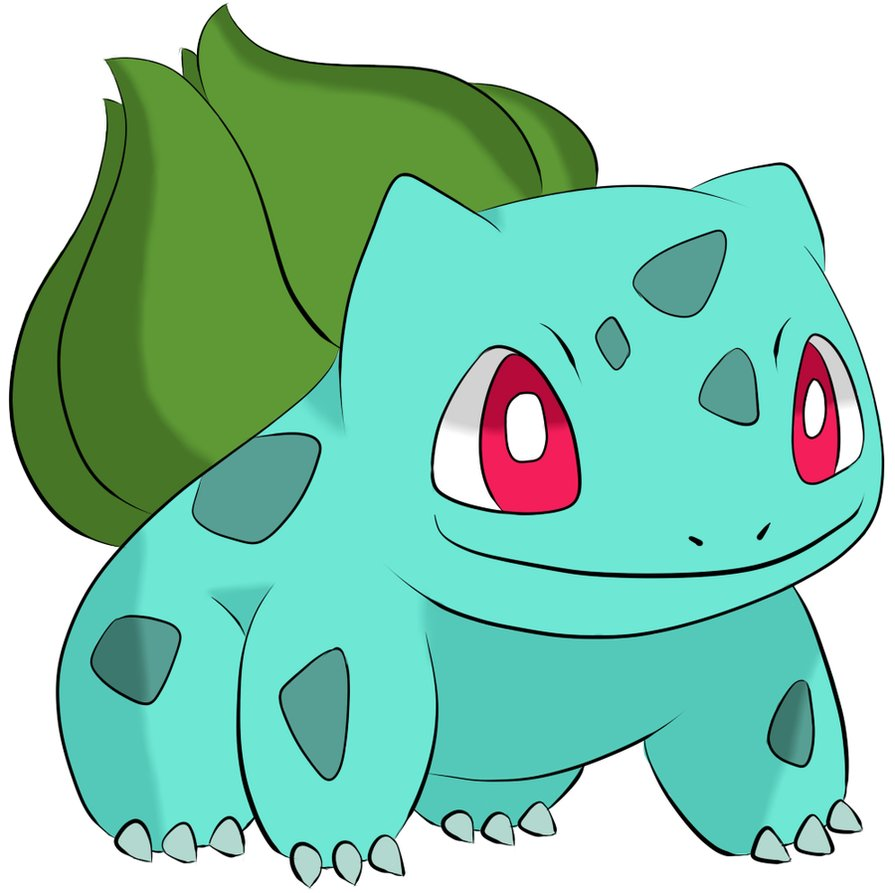

Model predicted: grass
grass: 96.70%	poison: 3.19%	bug: 0.05%	rock: 0.03%	fairy: 0.01%	psychic: 0.01%	
ground: 0.00%	ghost: 0.00%	water: 0.00%	normal: 0.00%	fighting: 0.00%	steel: 0.00%	
electric: 0.00%	ice: 0.00%	flying: 0.00%	dragon: 0.00%	fire: 0.00%	dark: 0.00%	


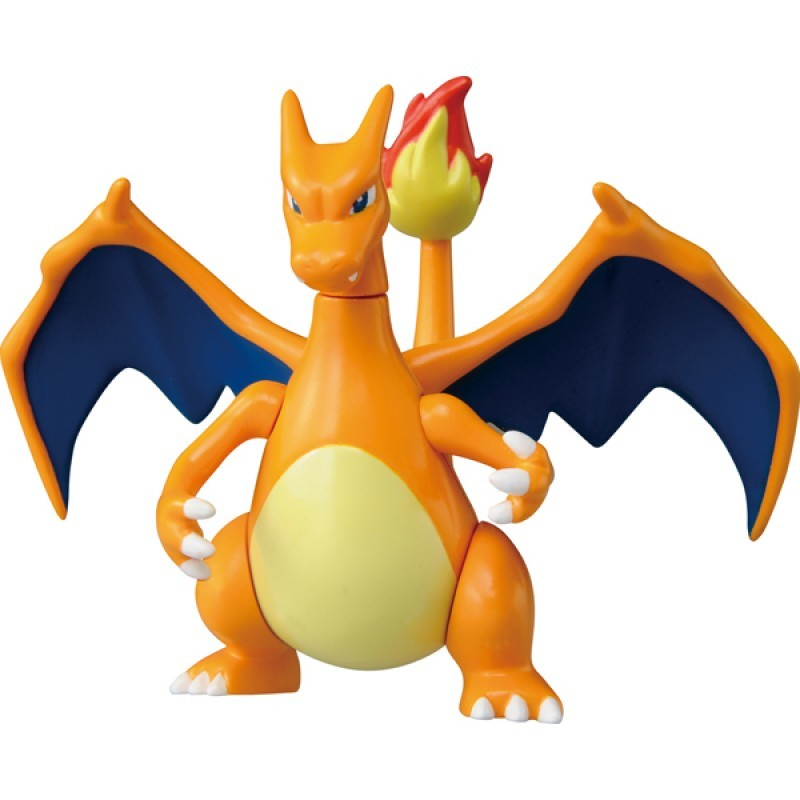

Model predicted: fire
fire: 99.97%	normal: 0.02%	dark: 0.00%	psychic: 0.00%	electric: 0.00%	water: 0.00%	
dragon: 0.00%	rock: 0.00%	bug: 0.00%	ice: 0.00%	grass: 0.00%	ground: 0.00%	
fighting: 0.00%	fairy: 0.00%	poison: 0.00%	ghost: 0.00%	steel: 0.00%	flying: 0.00%	


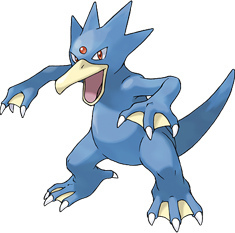

Model predicted: water
water: 98.36%	bug: 1.00%	rock: 0.44%	dragon: 0.08%	poison: 0.03%	steel: 0.03%	
ice: 0.02%	electric: 0.01%	normal: 0.01%	ground: 0.01%	dark: 0.00%	fighting: 0.00%	
fire: 0.00%	psychic: 0.00%	ghost: 0.00%	grass: 0.00%	fairy: 0.00%	flying: 0.00%	


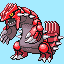

Model predicted: ground
ground: 39.23%	dark: 19.56%	bug: 18.88%	steel: 6.72%	dragon: 3.29%	ghost: 2.56%	
rock: 2.43%	fire: 1.48%	normal: 1.28%	water: 0.79%	psychic: 0.59%	fighting: 0.55%	
flying: 0.55%	poison: 0.55%	grass: 0.50%	fairy: 0.45%	ice: 0.31%	electric: 0.28%	


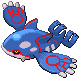

Model predicted: water
water: 51.55%	steel: 17.39%	rock: 13.47%	bug: 12.50%	poison: 3.16%	dragon: 0.52%	
ground: 0.50%	ghost: 0.23%	normal: 0.15%	ice: 0.11%	dark: 0.09%	grass: 0.08%	
psychic: 0.06%	electric: 0.05%	fighting: 0.05%	fire: 0.04%	fairy: 0.03%	flying: 0.01%	


In [5]:
test_pokemon_list = ["Bulbasaur", "Charizard", "Golduck", "Groudon", "Kyogre"]
for pokemon in test_pokemon_list:
    make_prediction(pokemon)